In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
# Loading the dataset
df = pd.read_csv("trainset.csv")

df.head()

,cls,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,NaN,NaN,0,0,25.001104,2.501652,4.923679,25.001104,1.250055,...,9.918524,67.526731,284.075684,8.877365,764,32,100,119,7.777778,4.666667
1,1,NaN,NaN,0,0,20.274271,2.409184,4.779725,20.274271,1.267142,...,9.636588,61.986524,226.038985,9.827782,429,23,82,96,6.166667,3.583333
2,1,NaN,NaN,0,0,23.679070,2.528665,4.931112,23.679070,1.392886,...,10.022647,65.026165,223.074562,8.579791,461,29,98,121,3.416667,3.638889
3,1,NaN,NaN,0,0,27.774585,2.557762,4.967131,27.774585,1.388729,...,10.250228,70.773493,266.069142,8.868971,735,35,120,150,3.888889,4.166667
4,1,NaN,NaN,0,0,39.613943,2.477563,4.835703,39.613943,1.320465,...,10.233043,79.537169,415.183067,7.548783,2674,45,156,182,8.500000,6.694444


In [18]:
# Loading the new dataset:
df = pd.read_csv("newtrainset.csv")

df.head()

,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,0,0,25.001104,2.501652,4.923679,25.001104,1.250055,3.907976,3.763026,...,9.918524,67.526731,284.075684,8.877365,764,32,100,119,7.777778,4.666667
1,1,0,0,20.274271,2.409184,4.779725,20.274271,1.267142,3.699349,3.675755,...,9.636588,61.986524,226.038985,9.827782,429,23,82,96,6.166667,3.583333
2,1,0,0,23.679070,2.528665,4.931112,23.679070,1.392886,3.823524,3.787841,...,10.022647,65.026165,223.074562,8.579791,461,29,98,121,3.416667,3.638889
3,1,0,0,27.774585,2.557762,4.967131,27.774585,1.388729,4.000936,4.113451,...,10.250228,70.773493,266.069142,8.868971,735,35,120,150,3.888889,4.166667
4,1,0,0,39.613943,2.477563,4.835703,39.613943,1.320465,4.331178,4.133872,...,10.233043,79.537169,415.183067,7.548783,2674,45,156,182,8.500000,6.694444


In [19]:
df["cls"].unique()

array([1, 0], dtype=int64)

In [20]:
df.dropna(subset=['cls'], inplace=True)

In [21]:
df["cls"].isna().any()

False

In [22]:
# Importing the required libraries and modules for GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [23]:
# Features and Parameters 
X = df.drop("cls", axis=1)
y = df["cls"]

In [24]:
# Getting training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Unnecessary step, but scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
## This doesn't work right now because in our dataset we have null values


"""
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train_scaled, y_train)

# Predict the classes on the test data
y_pred = gnb.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
"""

'\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.metrics import accuracy_score\n\n# Create the Gaussian Naive Bayes model\ngnb = GaussianNB()\n\n# Train the model on the training data\ngnb.fit(X_train_scaled, y_train)\n\n# Predict the classes on the test data\ny_pred = gnb.predict(X_test_scaled)\n\n# Calculate the accuracy\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\n'

In [27]:
# Nan values didn't work, so using HistGradientBoostingClassifier

from sklearn.ensemble import HistGradientBoostingClassifier

HGBoost_model = HistGradientBoostingClassifier()
HGBoost_model.fit(X_train, y_train)

HistGradientBoostingClassifier()

# This is accuracy for HistGradientBoostingClassifier


In [28]:
# Checking the accuracy

from sklearn.metrics import accuracy_score

# Assuming you have 'model' already trained and 'X_test', 'y_test' available
y_pred = HGBoost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8825


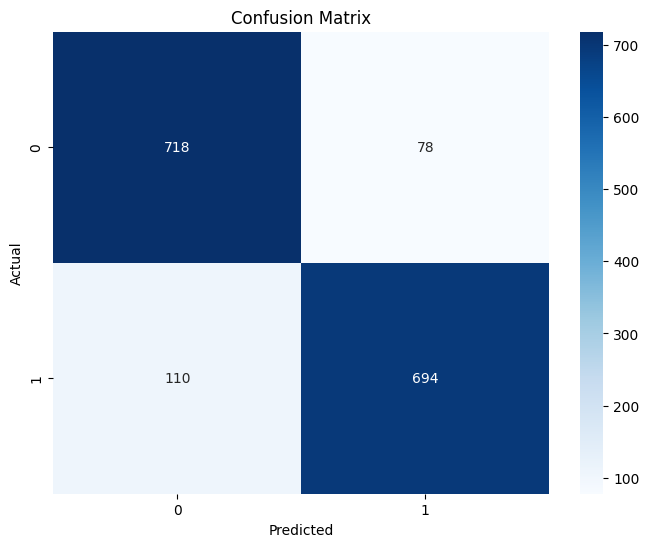

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


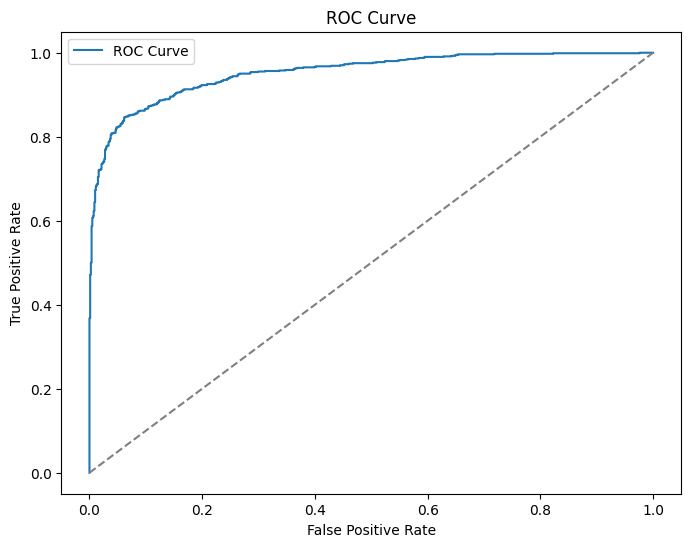

ROC AUC Score: 0.952271463036576


In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

y_probs = HGBoost_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)


# Random Forest classifier

In [31]:
# Using Random Forest Classifier: 
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer



# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.85


# Simple Inputer
Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.52


# XGBoost|

In [33]:
import xgboost as xgb


# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


# KNN

In [34]:
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier



imputer = KNNImputer(n_neighbors=5)  
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_imputed, y_train)

y_pred = KNN_model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.74125


In [35]:
test_data = pd.read_csv("newtestset.csv")
test_data.head()

,cls,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,1,0,0,27.088019,2.445165,4.890329,27.088019,1.231274,4.001574,3.958514,...,10.032189,56.149665,323.099143,8.077479,1090.0,35,112,130,8.979167,4.875000
1,1,0,0,37.050045,2.328086,4.614018,37.050045,1.277588,4.276564,4.773032,...,9.990720,77.406545,428.097683,8.736687,2803.0,39,144,163,9.138889,6.611111
2,1,0,2,32.096537,2.450210,4.747965,32.096537,1.283861,4.142878,3.746826,...,9.975576,75.253570,372.071468,9.074914,1688.0,35,128,149,8.138889,5.555556
3,1,0,0,45.263137,2.460053,4.890810,45.263137,1.293232,4.479404,4.901285,...,10.388595,86.901917,531.115018,8.566371,3487.0,54,182,214,11.583333,7.777778
4,1,0,0,43.807444,2.482121,4.964016,43.807444,1.288454,4.452201,4.590124,...,10.429547,83.429320,494.106706,8.668539,3362.0,53,178,208,10.812500,7.416667


In [36]:
X_test = df.drop("cls", axis=1)
y_test = df["cls"]

In [37]:
X_test_imputed = imputer.transform(X_test)


In [39]:
# Template for doing accuracy validation
"""
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
"""

'\ny_pred = model.predict(X_test_imputed)\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\n'

In [40]:
# Variables with trained models are as follows:

'''
HGBoost_model = HistGradientBoostingClassifier()
rf_model = RandomForestClassifier()
logreg_model = LogisticRegression()
xgb_model = xgb.XGBClassifier()
KNN_model = KNeighborsClassifier()
'''

'\nHGBoost_model = HistGradientBoostingClassifier()\nrf_model = RandomForestClassifier()\nlogreg_model = LogisticRegression()\nxgb_model = xgb.XGBClassifier()\nKNN_model = KNeighborsClassifier()\n'

# Validation with Test DataSet

## HGBoost

In [41]:
# Predicting accuracy for HGBoost

y_pred = HGBoost_model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.74775


C:\Users\alikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


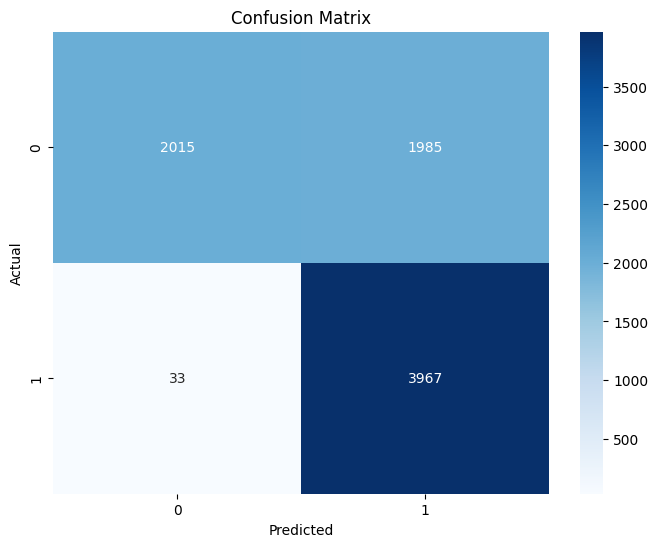

In [42]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

C:\Users\alikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


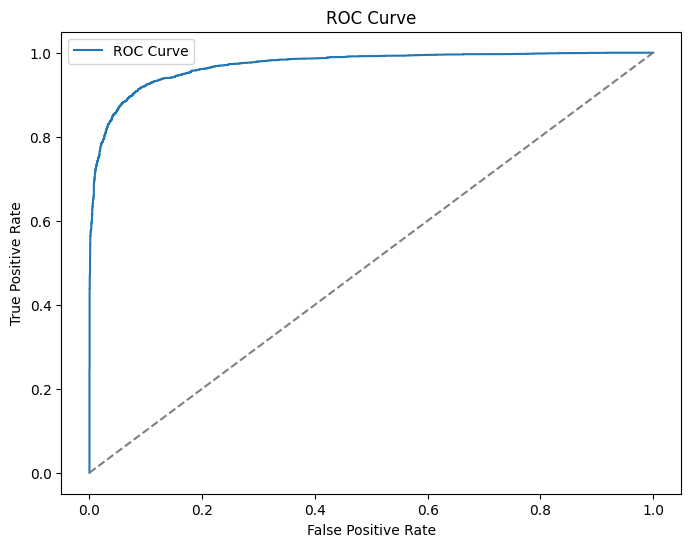

ROC AUC Score: 0.97062115625


In [43]:
y_probs = HGBoost_model.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

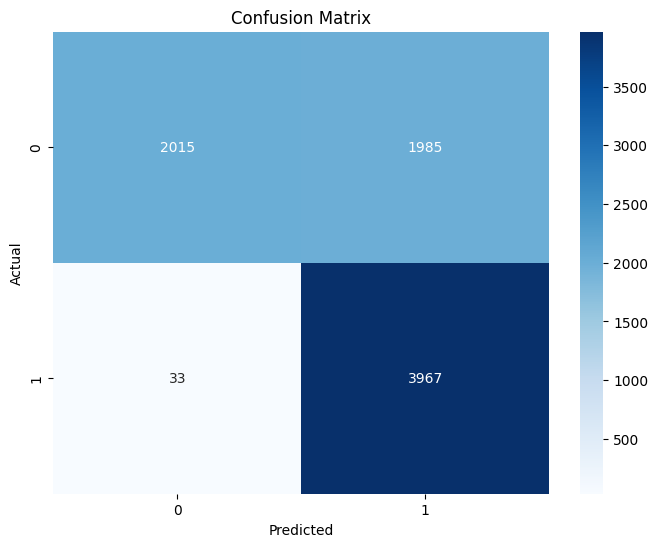

C:\Users\alikh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


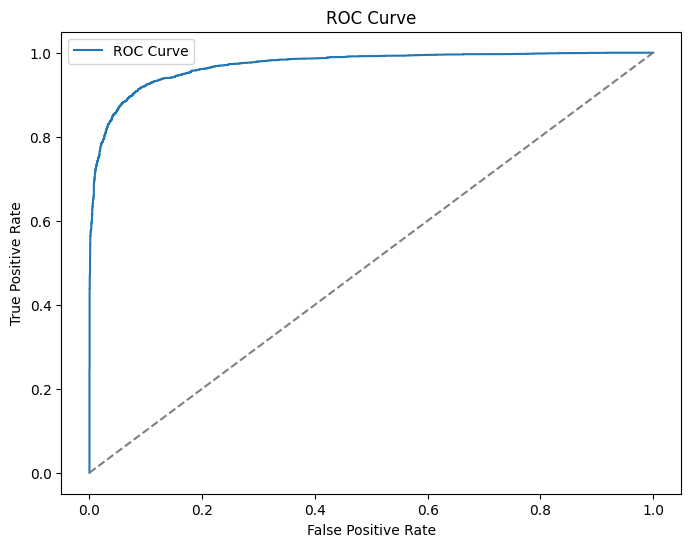

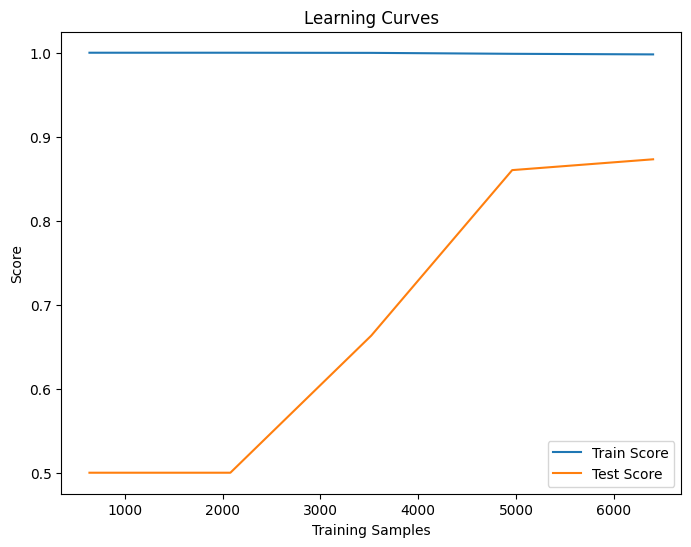

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import learning_curve

# Existing code
# X_test = df.drop("cls", axis=1)
# y_test = df["cls"]
# X_test_imputed = imputer.transform(X_test)
# y_pred = HGBoost_model.predict(X_test_imputed)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_probs = HGBoost_model.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print("ROC AUC Score:", roc_auc)

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    HGBoost_model, X_test_imputed, y_test, train_sizes=np.linspace(0.1, 1.0, 5), cv=5
)
plt.figure(figsize=(8, 6))
plt.plot(
    train_sizes, np.mean(train_scores, axis=1), label="Train Score"
)
plt.plot(
    train_sizes, np.mean(test_scores, axis=1), label="Test Score"
)
plt.xlabel("Training Samples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()

# Feature Importance Plot
if hasattr(HGBoost_model, "feature_importances_"):
    importances = HGBoost_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances[indices], y=range(len(indices)))
    feature_names = X_test.columns
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation='vertical')
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.title("Feature Importance Plot")
    plt.tight_layout()
    plt.show()



## Random Forest Classifier

In [44]:
y_pred = rf_model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.952625


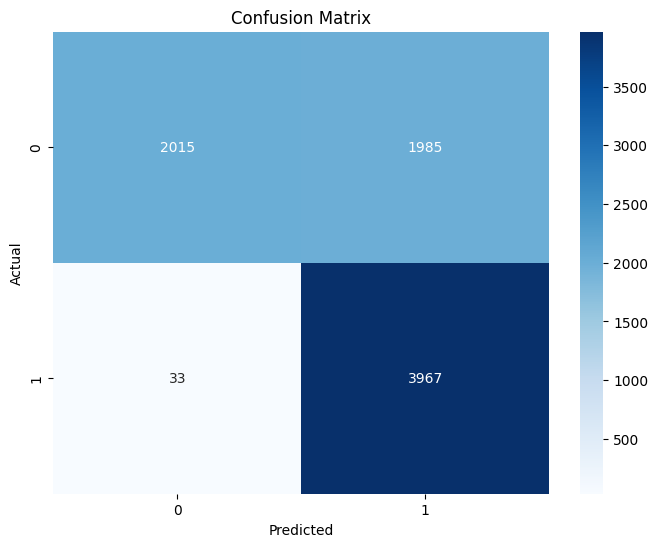

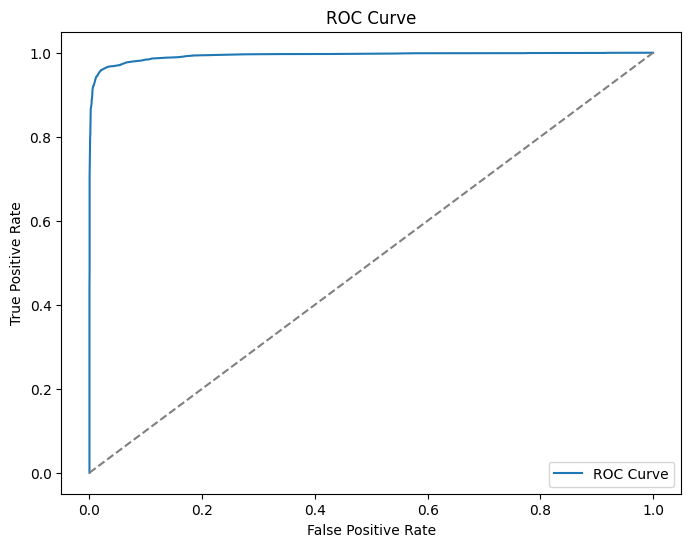

ROC AUC Score: 0.99345946875


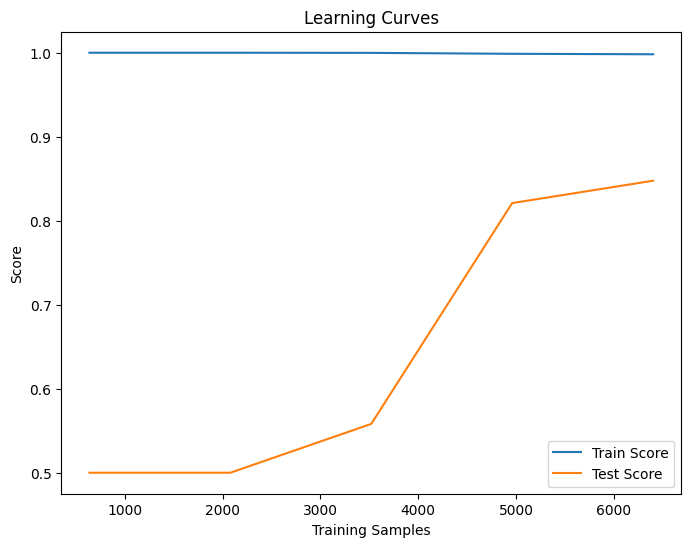

AttributeError: 'bool' object has no attribute 'all'

<Figure size 800x600 with 0 Axes>

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Existing code
# X_test = df.drop("cls", axis=1)
# y_test = df["cls"]
# X_test_imputed = imputer.transform(X_test)
# y_pred = rf_model.predict(X_test_imputed)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_probs = rf_model.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_test_imputed, y_test, train_sizes=np.linspace(0.1, 1.0, 5), cv=5
)
plt.figure(figsize=(8, 6))
plt.plot(
    train_sizes, np.mean(train_scores, axis=1), label="Train Score"
)
plt.plot(
    train_sizes, np.mean(test_scores, axis=1), label="Test Score"
)
plt.xlabel("Training Samples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()

# Feature Importance Plot
if hasattr(rf_model, "feature_importances_"):
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances[indices], y=range(len(indices)))
    feature_names = X_test.columns
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation='vertical')
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.title("Feature Importance Plot")
    plt.tight_layout()
    plt.show()


## Logistic Regression

In [45]:
y_pred = logreg_model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.512875


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Existing code
# X_test = df.drop("cls", axis=1)
# y_test = df["cls"]
# X_test_imputed = imputer.transform(X_test)
# y_pred = logreg_model.predict(X_test_imputed)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_probs = logreg_model.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    logreg_model, X_test_imputed, y_test, train_sizes=np.linspace(0.1, 1.0, 5), cv=5
)
plt.figure(figsize=(8, 6))
plt.plot(
    train_sizes, np.mean(train_scores, axis=1), label="Train Score"
)
plt.plot(
    train_sizes, np.mean(test_scores, axis=1), label="Test Score"
)
plt.xlabel("Training Samples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()

# Feature Importance Plot
# Logistic Regression does not inherently provide feature importances
# Therefore, this part is omitted for logreg_model



## XGBoost

In [46]:
y_pred = xgb_model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.967875


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import learning_curve
import xgboost as xgb

# Existing code
# X_test = df.drop("cls", axis=1)
# y_test = df["cls"]
# X_test_imputed = imputer.transform(X_test)
# y_pred = xgb_model.predict(X_test_imputed)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_probs = xgb_model.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_test_imputed, y_test, train_sizes=np.linspace(0.1, 1.0, 5), cv=5
)
plt.figure(figsize=(8, 6))
plt.plot(
    train_sizes, np.mean(train_scores, axis=1), label="Train Score"
)
plt.plot(
    train_sizes, np.mean(test_scores, axis=1), label="Test Score"
)
plt.xlabel("Training Samples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()

# Feature Importance Plot
plt.figure(figsize=(8, 6))
xgb.plot_importance(xgb_model, importance_type="weight")
plt.title("Feature Importance Plot")
plt.show()


## K-Neighbours Classifier

In [52]:
y_pred = KNN_model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.81425


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier

# Existing code
# X_test = df.drop("cls", axis=1)
# y_test = df["cls"]
# X_test_imputed = imputer.transform(X_test)
# y_pred = KNN_model.predict(X_test_imputed)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_probs = KNN_model.predict_proba(X_test_imputed)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    KNN_model, X_test_imputed, y_test, train_sizes=np.linspace(0.1, 1.0, 5), cv=5
)
plt.figure(figsize=(8, 6))
plt.plot(
    train_sizes, np.mean(train_scores, axis=1), label="Train Score"
)
plt.plot(
    train_sizes, np.mean(test_scores, axis=1), label="Test Score"
)
plt.xlabel("Training Samples")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()

# Feature Importance Plot
# K-Nearest Neighbors does not inherently provide feature importances
# Therefore, this part is omitted for KNN_model
